<a href="https://colab.research.google.com/github/santhoshml/python-practice/blob/main/linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [16]:
diabetes = load_diabetes()
my_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
my_df.head()

my_df['target']=diabetes.target
my_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [17]:
X = my_df.drop("target", axis=1)
y = my_df["target"]
#

In [18]:
X.shape, y.shape

((442, 10), (442,))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [21]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)
#

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [24]:
# r2 is variance of dependant variable explained by independant variable
# how well the model fits the data, 0-1, higher the better
r2 = r2_score(y_test, y_pred)
# avg squared distance b/w predicted and actual val
mse=mean_squared_error(y_test, y_pred)

# avg abs distance b/w predicted and actual val
mae=mean_absolute_error(y_test, y_pred)

# starting point of the reg line on y-axis
# value of dependant var if independant var is zero
intercept=lr.intercept_
coef=lr.coef_

print()
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Intercept:", intercept)
# print("Coefficients:", coef)
#


R2 Score: 0.4526027629719195
Mean Squared Error: 2900.193628493482
Mean Absolute Error: 42.79409467959994
Intercept: 151.34560453985995


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

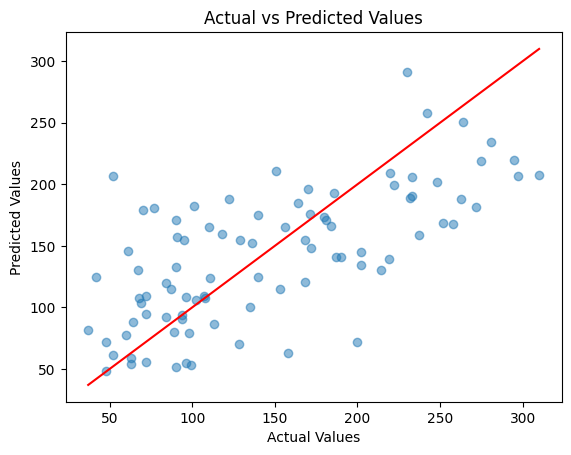

In [29]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")


Text(0.5, 1.0, 'Residuals vs Actual Values')

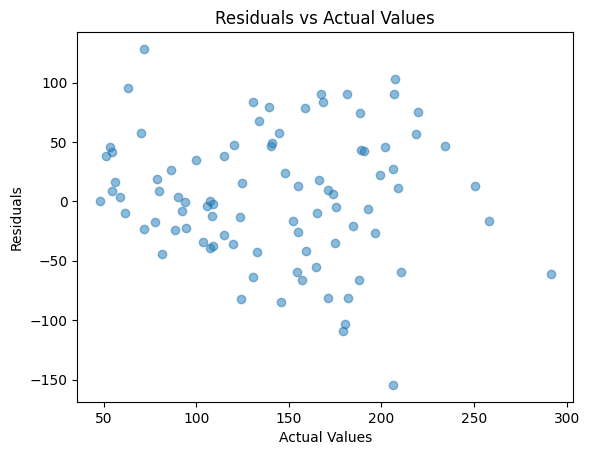

In [31]:
# plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Values")